<a href="https://colab.research.google.com/github/ramtiin/Predicting-YouTube-Dislikes-via-Catboost-and-Sentiment-Analysis/blob/main/Predicting_YouTube_Dislikes_via_Catboost_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Downloading the dataset:**

For downloading datasets from Kaggle, you will need an API key.

To find your API credentials, follow these steps:

1.   After signing in to https://kaggle.com/, select "My Account" from the menu on the top right. 
2.   Click "Create New API Token" under the "API" section. This will download a file kaggle.json.

Then upload kaggle.json file to this notebook and run the following codes:


In [2]:
! pip install -q kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

! kaggle datasets download -d dmitrynikolaev/youtube-dislikes-dataset

 83% 49.0M/58.8M [00:03<00:00, 12.9MB/s]
100% 58.8M/58.8M [00:03<00:00, 18.1MB/s]


In [3]:
! unzip youtube-dislikes-dataset.zip

Archive:  youtube-dislikes-dataset.zip
  inflating: video_IDs/unique_ids_CA.txt  
  inflating: video_IDs/unique_ids_GB.txt  
  inflating: video_IDs/unique_ids_GB_CA_US.txt  
  inflating: video_IDs/unique_ids_US.txt  
  inflating: video_IDs/unique_ids_from_kaggle.txt  
  inflating: youtube_dislike_dataset.csv  


In [4]:
df = pd.read_csv("youtube_dislike_dataset.csv")

In [5]:
df


,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...


**Installing necessary packages:**

In [6]:
!pip install --upgrade vaderSentiment
!pip install texthero
!pip install catboost
!pip install shap

     |████████████████████████████████| 125 kB 4.1 MB/s 
     |████████████████████████████████| 1.5 MB 5.9 MB/s 
     |████████████████████████████████| 235 kB 38.9 MB/s 
     |████████████████████████████████| 749 kB 46.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 76.1 MB 1.2 MB/s 
     |████████████████████████████████| 564 kB 4.3 MB/s 


**Cleaning texts:**

In [7]:
import texthero as hero
from texthero import preprocessing

df_new = df.drop(['title','video_id','channel_title','channel_id','published_at'],axis=1)

df_new['description'] = hero.clean(df_new['description'])
df_new['comments'] = hero.clean(df_new['comments'])
df_new['tags'] = hero.clean(df_new['tags'])
df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,view_count,likes,dislikes,comment_count,tags,description,comments
0,1048888,19515,226,1319,football soccer ftbol alemn bundesliga season ...,enjoy best skills goals jadon sancho sub https...,respect dortmund fans must sad losing wish wel...
1,15352638,359277,7479,18729,migos avalanche quality control music motown r...,watch official video migos avalanche stream do...,migos makes want live live fullest amount swag...
2,925281,11212,401,831,,hannah waddingham wins emmy supporting actress...,hannah energy bursts screen well deserved hann...
3,2641597,39131,441,3745,produce101japan jo1 thestar stargazer protosta...,jo1 young jo1 ver performance video jo1 3rd si...,youngver ren really perfect skillful performan...
4,715724,32887,367,1067,retaining wall new jersey highway direct conne...,one important innocuous parts constructed envi...,keep projects https practical engineering emai...
...,...,...,...,...,...,...,...
37417,120408275,2180780,35871,81360,lil tjay steady calling phone calling phone ti...,official video calling phone lil tjay featurin...,destined win https liltjay lnk destined2win so...
37418,2841917,20759,1049,2624,nba g league basketball game lakers pelicans p...,pelicans lakers full game highlights january l...,montrezl harrell going crazy rebounds putbacks...
37419,13346678,720854,4426,90616,mamamoo waw waw mamamoo waw wawn wawn,mv mamamoo instagram https bit ly 2trqpjd face...,honestly know song hit hard something mature s...
37420,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,doctor hair https www thedoctorhair com fbclid...,foi um prazer passar esta tarde com vocs debat...


**Sentiment Analysis using VADER:**

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
description_analysis = df_new['description'].apply(analyzer.polarity_scores).apply(pd.Series)

In [10]:
comments_analysis = df_new['comments'].apply(analyzer.polarity_scores).apply(pd.Series)

In [11]:
tags_analysis = df_new['tags'].apply(analyzer.polarity_scores).apply(pd.Series)

In [12]:
description_analysis.rename(columns={"neg": "des_neg", "neu": "des_neu", "pos": "des_pos", "compound": "des_compound"},inplace=True)
comments_analysis.rename(columns={"neg": "com_neg", "neu": "com_neu", "pos": "com_pos", "compound": "com_compound"},inplace=True)
tags_analysis.rename(columns={"neg": "tag_neg", "neu": "tag_neu", "pos": "tag_pos", "compound": "tag_compound"},inplace=True)

sentiment_df = pd.concat([description_analysis,comments_analysis,tags_analysis],axis=1)

**Merging data:**

In [13]:
cleaned_df = pd.concat([df_new,sentiment_df],axis=1).drop(["comments","description","tags"],axis=1)

**Specify input variables (X) and an output variable (y):**

In [14]:
X = cleaned_df.drop(['dislikes'],axis=1)
y = cleaned_df['dislikes']

**Traning and testing our model by K-fold cross-validation method:**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

folds = 5

regressor = CatBoostRegressor(silent=True)

pipeline = Pipeline([ ('estimator', regressor)])

cv = KFold(n_splits=folds)
scores = cross_val_score(pipeline, X, y,cv = cv , scoring='neg_mean_absolute_error')

# Results:

In [16]:
scores

array([-2661.76505057, -2867.42187418, -2998.63830142, -3015.20152734,
       -2797.32965119])

In [17]:
scores.mean()

-2868.071280941621

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
cat_regressor = CatBoostRegressor(silent=True)
cat_regressor.fit(X_train,y_train)

**The impact of each feature on the model output:**

*For having a cleaner plot, we remove outliers using Z-scores.*

In [20]:
import scipy.stats as stats
z_scores = stats.zscore(X_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1).all(axis=1)
new_X = X_train[filtered_entries]

In [21]:
import shap
explainer = shap.TreeExplainer(cat_regressor)
shap_values = explainer.shap_values(new_X)

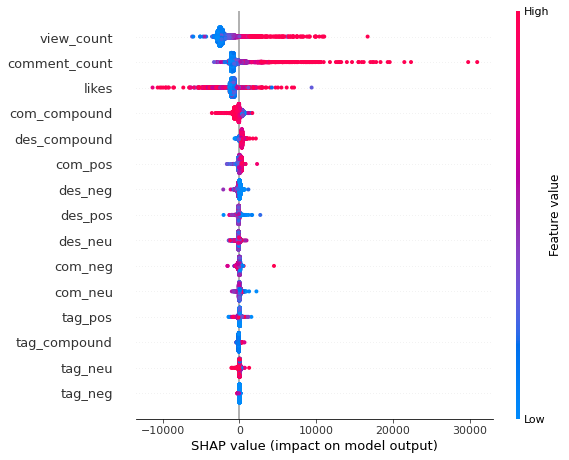

In [22]:
shap.summary_plot(shap_values, new_X)

**The relationship between MAE and video dislike quantity:**

In [23]:
from sklearn.metrics import mean_absolute_error
errors = []
ys = []
for i in range (np.min(y_test)+1,np.max(y_test),1000):
  ys.append(i)
  slected_y_test = y_test[y_test<i]
  slected_x_test = X_test[y_test<i]
# Predicting the Test set results
  y_pred = cat_regressor.predict(slected_x_test)
  np.set_printoptions(precision=2)
  errors.append(mean_absolute_error(slected_y_test, y_pred))

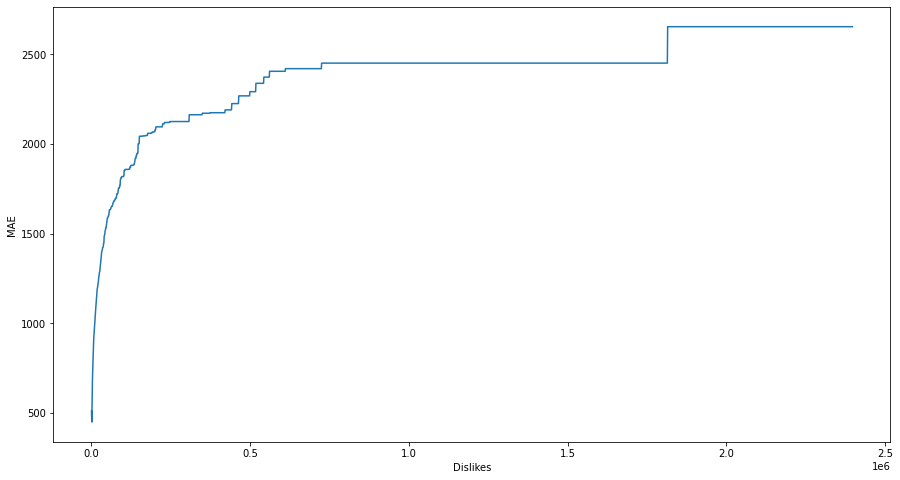

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(ys ,errors)
plt.xlabel("Dislikes")
plt.ylabel("MAE")
plt.show()

**The relationship between MAE and video views quantity:**

In [25]:
from sklearn.metrics import mean_absolute_error
errors = []
ys = []
for i in range (np.min(X_test['view_count'])+1,np.max(X_test['view_count']),100000):
  ys.append(i)
  selected_y_test = y_test[X_test['view_count']<i]
  selected_x_test = X_test[X_test['view_count']<i]
# Predicting the Test set results
  y_pred = cat_regressor.predict(selected_x_test)
  np.set_printoptions(precision=2)
  errors.append(mean_absolute_error(selected_y_test, y_pred))

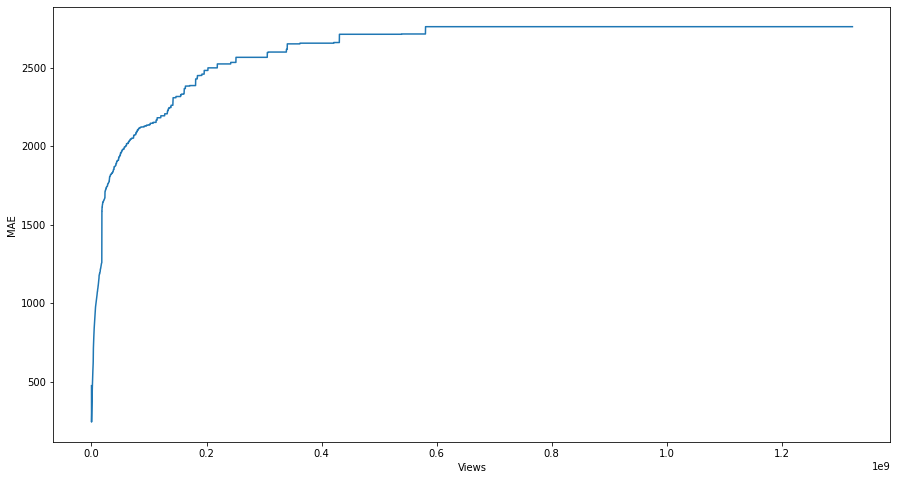

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(ys ,errors)
plt.xlabel("Views")
plt.ylabel("MAE")
plt.show()